<a href="https://colab.research.google.com/github/hemanshi24/Deep-Learning-DCGAN/blob/main/DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os  # File and directory operations
import cv2  # OpenCV for image processing
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Data visualization
import torch  # PyTorch for deep learning
from torchvision import datasets, transforms  # PyTorch datasets and transforms
import torchvision  # PyTorch vision library
from PIL import Image  # Python Imaging Library for image manipulation
import pandas as pd  # Data manipulation and analysis
import argparse  # Parsing command-line arguments
import random  # Random number generation
import torch.nn as nn  # Neural network modules and layers
import torch.optim as optim  # Optimization algorithms in PyTorch
import torchvision.datasets as dset  # PyTorch datasets
import torchvision.transforms as transforms  # PyTorch transforms
import torchvision.utils as vutils  # Utility functions for working with PyTorch tensors
import matplotlib.animation as animation  # Animation in Matplotlib
from IPython.display import HTML  # Display HTML content
from torchvision.utils import make_grid  # Create a grid of images
from torch.utils.data import DataLoader  # Data loader in PyTorch
from torchvision.transforms import ToPILImage  # Convert tensors to PIL images
from torchvision.models import inception_v3  # Pre-trained InceptionV3 model
from skimage.transform import resize  # Image resizing
from tqdm import tqdm  # Progress bar for loops
from numpy import cov, trace, iscomplexobj, expand_dims, log, mean, std, exp  # Numerical operations
from scipy.linalg import sqrtm  # Matrix square root
from math import floor  # Math operations
from keras.applications.inception_v3 import InceptionV3, preprocess_input  # InceptionV3 model from Keras
from skimage.transform import resize  # Image resizing in scikit-image
from numpy import asarray  # Conversion to NumPy array


In [ ]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FaceExpressions/data.csv')

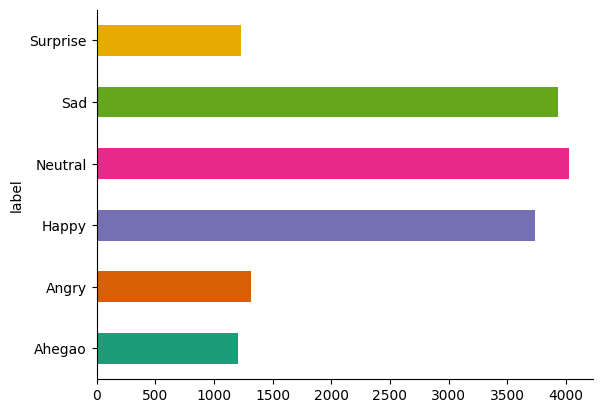

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Import Data (Images)**
* Data Labeling
* Data Transformation  





In [ ]:
image_folder_paths = [
    "/content/drive/MyDrive/Colab Notebooks/FaceExpressions/dataset/Ahegao",
    "/content/drive/MyDrive/Colab Notebooks/FaceExpressions/dataset/Angry",
    "/content/drive/MyDrive/Colab Notebooks/FaceExpressions/dataset/Happy",
    "/content/drive/MyDrive/Colab Notebooks/FaceExpressions/dataset/Neutral",
    "/content/drive/MyDrive/Colab Notebooks/FaceExpressions/dataset/Sad",
    "/content/drive/MyDrive/Colab Notebooks/FaceExpressions/dataset/Surprise"
]

# Initialize a dictionary to store the count of images for each label
label_count = {label: 0 for label in df['label']}

# Store image and label
images = []
labels = []

# Iterate through each image folder
max_images_per_label = 100  # Limit the number of images per label
for folder_path in image_folder_paths:
    # Get the label corresponding to the folder from the DataFrame
    label = os.path.basename(folder_path)

    # Iterate through each image in the folder
    count = 0
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.png')):  # Adjust file extensions as needed
            if count >= max_images_per_label:
                break

            label_count[label] += 1

            # Load the image as a PIL image
            image_path = os.path.join(folder_path, filename)
            image = Image.open(image_path).convert("RGB")

            # Append the image and its label
            images.append(image)
            labels.append(label)
            count += 1

# Print each label with image
for label, count in label_count.items():
    print(f"Label: {label}, Number of Images: {count}")

# transformations
image_size = 64
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Pixel values from -1 to 1
])

# Create custom dataset
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Create dataset instance
dataset = CustomDataset(images, labels, transform=transform)

# Define DataLoader parameters
batch_size = 64
shuffle = True

# Create DataLoader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Print shape of first batch
for batch_images, batch_labels in dataloader:
    print("Shape of images in the first batch:", batch_images.shape)
    print("Number of labels in the first batch:", len(batch_labels))
    break  # Only print shape of the first batch


Label: Surprise, Number of Images: 100
Label: Sad, Number of Images: 100
Label: Ahegao, Number of Images: 100
Label: Happy, Number of Images: 100
Label: Neutral, Number of Images: 100
Label: Angry, Number of Images: 100
Shape of images in the first batch: torch.Size([64, 3, 64, 64])
Number of labels in the first batch: 64


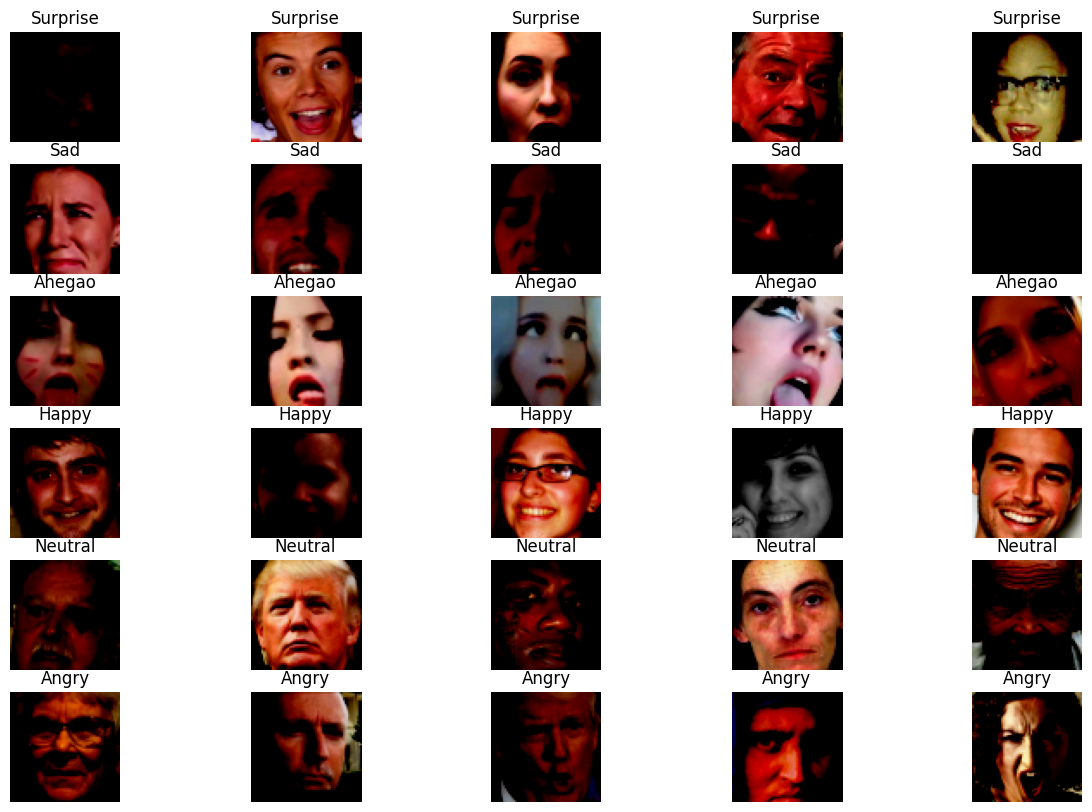

In [ ]:
import matplotlib.pyplot as plt

# Display 5 image
num_images_per_label = 5

# Initialize a dictionary to store images for each label
label_images = {label: [] for label in label_count.keys()}

for images, labels in dataloader:
    for image, label in zip(images, labels):
        # Convert tensor to numpy array and transpose the dimensions
        image_np = image.permute(1, 2, 0).numpy()
        # Associate each image with its corresponding label in the dictionary
        label_images[label].append(image_np)

# Plot 5 images
plt.figure(figsize=(15, 10))
for label, images in label_images.items():
    for i in range(min(num_images_per_label, len(images))):
        plt.subplot(len(label_count), num_images_per_label, list(label_count.keys()).index(label) * num_images_per_label + i + 1)
        plt.imshow(images[i])
        plt.title(label)
        plt.axis('off')
plt.show()

In [ ]:
# Iterate through the dataloader
for images, labels in dataloader:
    #minimum and maximum pixel values of the images
    print("Minimum pixel value:", images.min())
    print("Maximum pixel value:", images.max())
    break

Minimum pixel value: tensor(-1.)
Maximum pixel value: tensor(1.)


In [ ]:
# Set the number of workers for the dataloader to 2
num_workers = 2

# Define the batch size for training as 128
batch_size = 128

# Define the image size for transformation to 64x64 pixels
image_size = 64

# Define the number of channels in the training images; 3 for color images
num_channels = 3

# Define the size of the latent vector (z) as 100
latent_vector_size = 100

# Define the size of feature maps in the generator as 64
generator_feature_maps = 64

# Define the size of feature maps in the discriminator as 64
discriminator_feature_maps = 64

# Specify the number of training epochs as 500
num_epochs = 500

# Set the learning rate for optimizers to 0.0002
learning_rate = 0.0002

# Set the beta1 hyperparameter for Adam optimizers to 0.5
beta1 = 0.5

# Specify the number of available GPUs as 1
num_gpus = 1

# Rephrase the comments for clarity and consistency.

# **custom weights initialization**


In [ ]:

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

# **Generator**

A neural network model called the generator in a Deep Convolutional Generative Adversarial Network (DCGAN) is in charge of producing fresh data samples that closely match the training data. The generator converts random noise into useful data samples, such pictures, from its input.



In [ ]:
class Generator(nn.Module):
    def __init__(self, num_gpus):
        super(Generator, self).__init__()
        self.num_gpus = num_gpus
        self.main = nn.Sequential(
            nn.ConvTranspose2d(latent_vector_size, generator_feature_maps * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(generator_feature_maps * 8),
            nn.ReLU(True),
            # ``(generator_feature_maps*8) x 4 x 4``
            nn.ConvTranspose2d(generator_feature_maps * 8, generator_feature_maps * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(generator_feature_maps * 4),
            nn.ReLU(True),
            #``(generator_feature_maps*4) x 8 x 8``
            nn.ConvTranspose2d(generator_feature_maps * 4, generator_feature_maps * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(generator_feature_maps * 2),
            nn.ReLU(True),
            #``(generator_feature_maps*2) x 16 x 16``
            nn.ConvTranspose2d(generator_feature_maps * 2, generator_feature_maps, 4, 2, 1, bias=False),
            nn.BatchNorm2d(generator_feature_maps),
            nn.ReLU(True),
            # generator_feature_maps) x 32 x 32``
            nn.ConvTranspose2d(generator_feature_maps, num_channels, 4, 2, 1, bias=False),
            nn.Tanh()
            # ``(num_channels) x 64 x 64``
        )

    def forward(self, input):
        return self.main(input)


The generator part of a DCGAN is initialised and configured by this code, which also makes sure it's installed on the proper hardware (CPU or GPU) and may even be parallelized over many GPUs. After applying weight initialization, the architecture of the generator is written out for examination.



In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Create the generator
generator = Generator(num_gpus).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (num_gpus > 1):
    generator = nn.DataParallel(generator, list(range(num_gpus)))

#  to mean=0, stdev=0.02.
generator.apply(weights_init)

# Print the model
print(generator)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


# **The Discriminator**
A neural network model called the discriminator in a DCGAN is in charge of differentiating between produced and actual data samples. It predicts whether input data is produced or real based on input data, regardless of whether it is genuine or generated. In order to gradually increase its capacity to distinguish between created and genuine data, the discriminator is trained in an adversarial manner alongside the generator.


In [ ]:
class Discriminator(nn.Module):
    def __init__(self, num_gpus):
        super(Discriminator, self).__init__()
        self.num_gpus = num_gpus
        #Sequential Model
        self.main = nn.Sequential(
            #kernel size=4, stride=2, padding=1
            nn.Conv2d(num_channels, discriminator_feature_maps, 4, 2, 1, bias=False),
            #LeakyRelu Activation Fnction with slope of negative 0.2
            nn.LeakyReLU(0.2, inplace=True),


            nn.Conv2d(discriminator_feature_maps, discriminator_feature_maps * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(discriminator_feature_maps * 2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(discriminator_feature_maps * 2, discriminator_feature_maps * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(discriminator_feature_maps * 4),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(discriminator_feature_maps * 4, discriminator_feature_maps * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(discriminator_feature_maps * 8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(discriminator_feature_maps * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Create the Discriminator
discriminator = Discriminator(num_gpus).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (num_gpus > 1):
    discriminator = nn.DataParallel(discriminator, list(range(num_gpus)))

# to mean=0, SD=0.2.
discriminator.apply(weights_init)

# Print the model
print(discriminator)


Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


In [ ]:
# Initialize the BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
fixed_noise = torch.randn(64, latent_vector_size, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both Generator and Discriminator
optimizerD = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(beta1, 0.999))
optimizerG = optim.Adam(generator.parameters(), lr=learning_rate, betas=(beta1, 0.999))


In [ ]:
# Training Loop
# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")

for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):

        discriminator.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = discriminator(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, latent_vector_size, 1, 1, device=device)
        # Generate fake image batch with G
        fake = generator(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = discriminator(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()


        generator.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = discriminator(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = generator(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...


NameError: name 'dataloader' is not defined

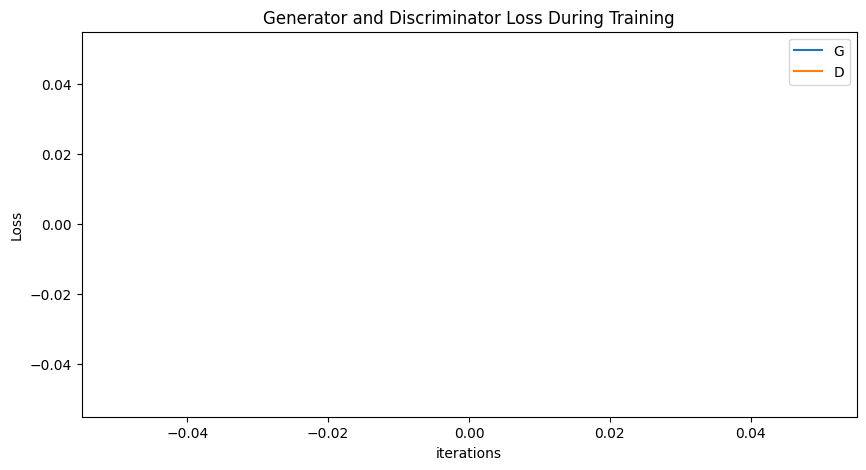

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()

In [ ]:
# Create a figure
fig = plt.figure(figsize=(8, 8))
plt.axis("off")

# Create a list of images
ims = [[plt.imshow(np.transpose(i, (1, 2, 0)), animated=True)] for i in img_list]

# Create an animation
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

# Display the animation
HTML(ani.to_jshtml())


In [ ]:
# Define the number of images to plot for each label
num_images_per_label = 5

# Initialize a dictionary to store generated images for each label
label_images = {label: [] for label in label_count.keys()}

# Generate images using the DCGAN generator
for label in label_images.keys():
    # Generate images using the DCGAN generator
    with torch.no_grad():
        noise = torch.randn(num_images_per_label, latent_vector_size, 1, 1, device=device)
        generated_batch = generator(noise).cpu().detach()

    # Store generated images
    label_images[label] = generated_batch

# Plot generated images for each label
plt.figure(figsize=(15, 10))
for i, (label, images) in enumerate(label_images.items()):
    # Plot generated images
    for j in range(num_images_per_label):
        plt.subplot(len(label_count), num_images_per_label, i * num_images_per_label + j + 1)
        plt.imshow(np.transpose(images[j], (1, 2, 0)))
        plt.title(label)
        plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from skimage.transform import resize

# Define the target shape
target_shape = (299, 299, 3)

# Resize each image in the img_list
resized_images = [resize(image, target_shape, anti_aliasing=True) for image in img_list]
# Convert the list of resized images to a numpy array
resized_images_array = np.array(resized_images)


In [ ]:
all_generated_images =resized_images
# Function to resize an image to (299, 299, 3)
def resize_image(img):
    return resize(img, (299, 299, 3), anti_aliasing=True)

# Function to calculate Inception Score
def calculate_inception_score(images, batch_size=32, resize=False, splits=1):
    # Load InceptionV3 model
    model = inception_v3(pretrained=True, transform_input=False, aux_logits=True)
    model.eval()

    # Resize images if required
    if resize:
        images = [resize_image(img) for img in images]

    # Convert images to tensor and normalize
    images = torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0

    # Define a DataLoader for batch processing
    data_loader = DataLoader(images, batch_size=batch_size)

    # Calculate predictions for the images
    preds = []
    with torch.no_grad():
        for batch in data_loader:
            pred = torch.softmax(model(batch), dim=1).cpu().numpy()
            preds.append(pred)
    preds = np.concatenate(preds, axis=0)

    # Calculate Inception Score
    scores = []
    for i in range(splits):
        part = preds[(i * preds.shape[0] // splits):((i + 1) * preds.shape[0] // splits), :]
        kl = part * (np.log(part) - np.log(np.expand_dims(np.mean(part, axis=0), axis=0)))
        kl = np.mean(np.sum(kl, axis=1))
        scores.append(np.exp(kl))
    is_avg = np.mean(scores)
    is_std = np.std(scores)
    return is_avg, is_std

# Assuming you have already generated images and stored them in `all_generated_images`
# Calculate Inception Score
is_avg, is_std = calculate_inception_score(all_generated_images, resize=True)
print('Inception Score:', is_avg, '±', is_std)


In [ ]:
# Define a function to resize images to the required shape
def scale_images(images, new_shape):
    images_list = []
    for image in images:
        # Resize with nearest neighbor interpolation
        new_image = resize(image, new_shape, 0)
        images_list.append(new_image)
    return asarray(images_list)

# Define a function to calculate the Inception Score for your input data
def calculate_inception_score(images, n_split=10, eps=1E-16):
    # Load InceptionV3 model
    model = InceptionV3()
    # Enumerate splits of images/predictions
    scores = []
    n_part = floor(images.shape[0] / n_split)
    for i in range(n_split):
        # Retrieve images
        ix_start, ix_end = i * n_part, (i + 1) * n_part
        subset = images[ix_start:ix_end]
        # Convert from uint8 to float32
        subset = subset.astype('float32')
        # Scale images to the required size
        subset = scale_images(subset, (299, 299, 3))
        # Pre-process images, scale to [-1, 1]
        subset = preprocess_input(subset)
        # Predict p(y|x)
        p_yx = model.predict(subset)
        # Calculate p(y)
        p_y = expand_dims(p_yx.mean(axis=0), 0)
        # Calculate KL divergence using log probabilities
        kl_d = p_yx * (log(p_yx + eps) - log(p_y + eps))
        # Sum over classes
        sum_kl_d = kl_d.sum(axis=1)
        # Average over images
        avg_kl_d = mean(sum_kl_d)
        # Undo the log
        is_score = exp(avg_kl_d)
        # Store
        scores.append(is_score)
    # Average across images
    is_avg, is_std = mean(scores), std(scores)
    return is_avg, is_std

# Assuming your input data is stored in `your_input_data`
# Calculate the Inception Score
is_avg, is_std = calculate_inception_score(resized_images_array)
print('Inception Score:', is_avg, '±', is_std)


In [ ]:
# Import the necessary modules
from scipy.linalg import sqrtm
from numpy import cov, iscomplexobj, trace, mean, std, floor, log, exp, random, expand_dims, asarray
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from skimage.transform import resize
import torch

In [ ]:
# Function to calculate Frechet Inception Distance (FID)
def calculate_fid(features1, features2):
    # Calculate mean and covariance statistics
    mu1, sigma1 = features1.mean(axis=0), cov(features1, rowvar=False)
    mu2, sigma2 = features2.mean(axis=0), cov(features2, rowvar=False)
    # Calculate sum squared difference between means
    ssdiff = np.sum((mu1 - mu2) ** 2.0)
    # Calculate square root of the product of covariances
    covmean = sqrtm(sigma1.dot(sigma2))
    # Check and correct imaginary numbers from sqrt
    if iscomplexobj(covmean):
        covmean = covmean.real
    # Calculate FID score
    fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

# Define two collections of activations
features1 = random.random((10 * 2048)).reshape((10, 2048))
features2 = random.random((10 * 2048)).reshape((10, 2048))  # FID between features1 and features1
fid_same = calculate_fid(features1, features1)
print('FID (same): %.3f' % fid_same)
# FID between features1 and features2
fid_different = calculate_fid(features1, features2)
print('FID (different): %.3f' % fid_different)


In [ ]:
!jupyter nbconvert DCGAN.ipynb --to html
